<a href="https://colab.research.google.com/github/sugunayaparala/-Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


we have to import packeges and data set for given data set

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
working_dir_path='/content/drive/My Drive/Project/Hotel Bookings.csv'
df=pd.read_csv(working_dir_path)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [44]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [45]:
df.shape

(119390, 32)

In [46]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Missing the Data

Important questions when thinking about missing data:

How prevalent is the missing data? Is missing data random or does it have a pattern? The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.



In [47]:
## show the null and NaN values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [48]:
## checking for duplicated values
df.duplicated().sum()

31994

No handles with labels found to put in legend.


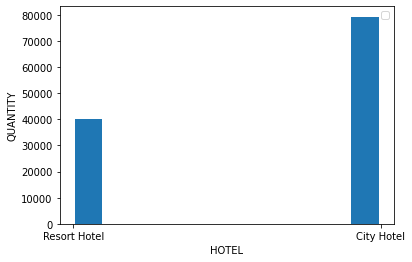

In [49]:
##plot for hotel and quantity
plt.hist(df['hotel'],rwidth=0.9)
plt.xlabel('HOTEL')
plt.ylabel('QUANTITY')
plt.legend()
plt.show()

In [50]:
## droping the some columns
df=df.drop(columns=['agent','company','arrival_date_year','reservation_status_date'])
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [51]:
## droping the duplicated values
df=df.drop_duplicates()
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [52]:
## count the values
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [53]:
## checing null values
df.isnull().sum()
## droping the null values
df=df.dropna()
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [54]:
##checking for null and missing data
df.isnull().sum()
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,102,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,34,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,109,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out


In [55]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000
mean,0.273884,80.033623,26.839514,15.817741,1.007592,2.628883,1.878583,0.139452,0.010846,0.039346,0.030057,0.177263,0.272523,0.735727,106.604624,0.083710,0.700801
std,0.445953,85.990822,13.654389,8.834580,1.028408,2.041877,0.626190,0.457155,0.113670,0.194417,0.369813,1.720550,0.728841,9.891722,54.987661,0.280802,0.832121
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.550000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


No handles with labels found to put in legend.


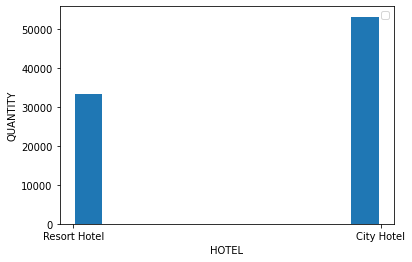

In [56]:
## histogram plot for hotel and quantity with processed data
plt.hist(df['hotel'],rwidth=0.9)
plt.xlabel('HOTEL')
plt.ylabel('QUANTITY')
plt.legend()
plt.show()

Finding the Outliers

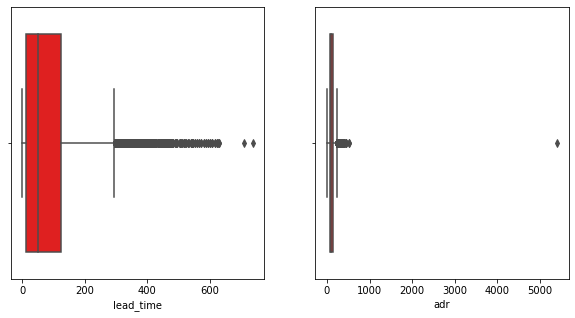

In [57]:
## finding the outiers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['lead_time'],color='red')
plt.subplot(1,2,2)
sns.boxplot(x=df['adr'], color='red')

*Removing the outliers *

In [58]:
## removing the outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print('internal quartile range',IQR)
df1=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
df1.shape

internal quartile range is_canceled                         1.00
lead_time                         113.00
arrival_date_week_number           21.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


(39525, 28)

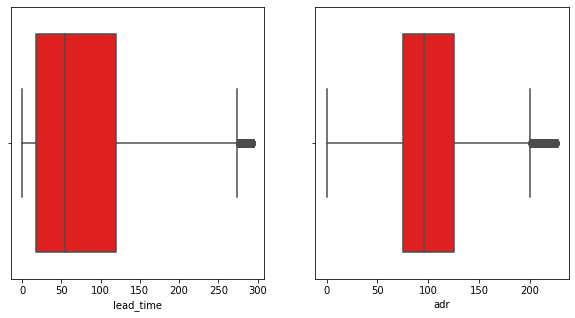

In [59]:
## check for the plot without outliers
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=df1['lead_time'], color='red')
plt.subplot(1,2,2)
sns.boxplot(x=df1['adr'], color='red')

Data Visualization

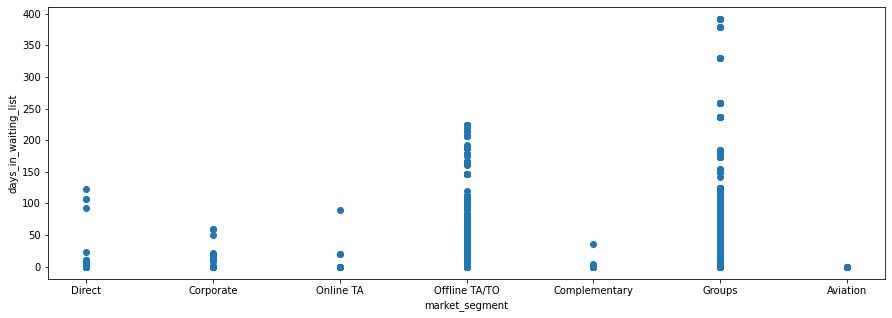

In [60]:
## plot  b/w market segment and days in waiting list
fig,x1=plt.subplots(figsize=(15,5))
x1.scatter(df['market_segment'], df['days_in_waiting_list'])
x1.set_xlabel('market_segment')
x1.set_ylabel('days_in_waiting_list')
plt.show()

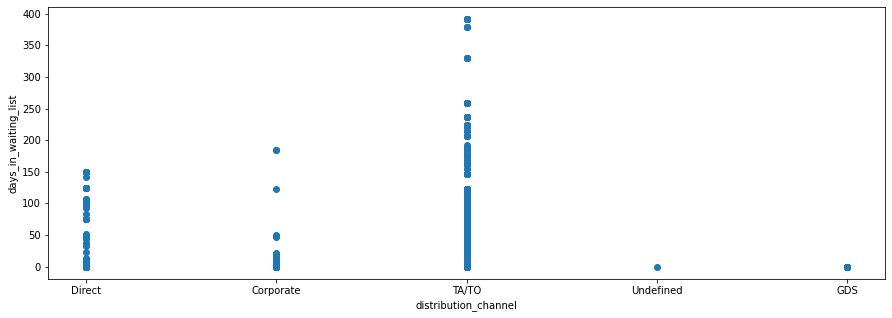

In [61]:
## plot b/w distributiob channel and days in waiting list
fig,x1=plt.subplots(figsize=(15,5))
x1.scatter(df['distribution_channel'], df['days_in_waiting_list'])
x1.set_xlabel('distribution_channel')
x1.set_ylabel('days_in_waiting_list')
plt.show()

grouping of arrival_date_month with lead time, stays in week nights, stays in weekend night, booking changes, days in waiting list, adr, hotel coloumns

In [62]:
## grouping of columns
grp=df.groupby('arrival_date_month')
a=grp['lead_time'].agg(np.mean)
b=grp['stays_in_week_nights'].agg(np.mean)
c=grp['stays_in_weekend_nights'].agg(np.mean)
d=grp['booking_changes'].agg(np.mean)
e=grp['days_in_waiting_list'].agg(np.mean)
f=grp['adr'].agg(np.mean)
g=grp['hotel'].agg(np.sum)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

arrival_date_month
April         76.024487
August       102.652779
December      59.271076
February      35.342014
January       34.692840
July         112.083300
June         103.931057
March         53.619188
May           91.950397
November      47.780142
October       83.195453
September     93.909448
Name: lead_time, dtype: float64
arrival_date_month
April        2.446117
August       3.014453
December     2.426654
February     2.292752
January      2.343284
July         2.997600
June         2.813090
March        2.538699
May          2.515049
November     2.484904
October      2.360297
September    2.710534
Name: stays_in_week_nights, dtype: float64
arrival_date_month
April        1.004081
August       1.145062
December     0.899704
February     0.927019
January      0.848583
July         1.208100
June         1.044496
March        0.866702
May          0.964002
November     0.854914
October      0.966769
September    1.069122
Name: stays_in_weekend_nights, dtype: float64
arriva

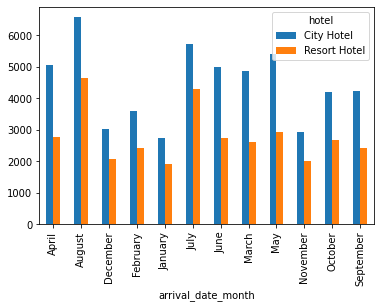

In [63]:
## plot for arrival date month and hotel
df2=df.groupby(['arrival_date_month','hotel']).size()
df2=df2.unstack()
df2.plot(kind='bar')

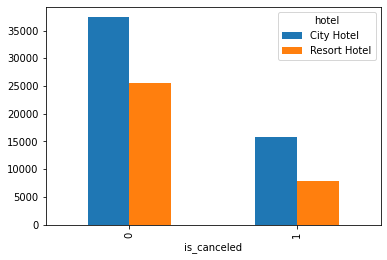

In [64]:
df3=df.groupby(['is_canceled','hotel']).size()
df3=df3.unstack()
df3.plot(kind='bar')

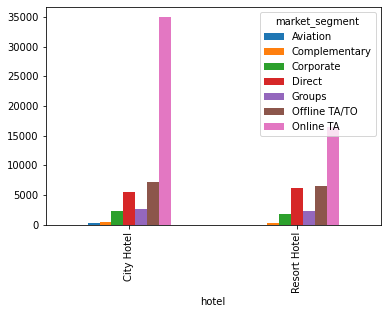

In [65]:
## plot for market segmentation and hotel
df4=df.groupby(['hotel', 'market_segment']).size()
df4=df4.unstack()
df4.plot(kind='bar')

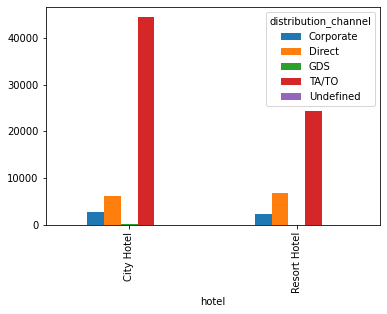

In [66]:
## ploi for the distribution channel vs hotel
df5=df.groupby(['hotel','distribution_channel']).size()
df5=df5.unstack()
df5.plot(kind='bar')
plt.show()

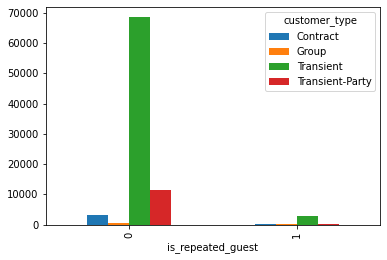

In [67]:
## plot for is repeated guest and customer type
df6=df.groupby(['is_repeated_guest','customer_type']).size()
df6=df6.unstack()
df6.plot(kind='bar')

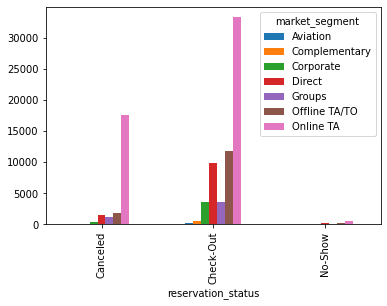

In [68]:
## plot for repeated guest and market segment
df7=df.groupby(['reservation_status','market_segment']).size()
df7=df7.unstack()
df7.plot(kind='bar')

In [69]:
df8=pd.DataFrame(df,columns=['total_of_special_requests ','adults','children','babies'])
corrmat=df8.corr()
print(corrmat)

                            total_of_special_requests   ...    babies
total_of_special_requests                          NaN  ...       NaN
adults                                             NaN  ...  0.016232
children                                           NaN  ...  0.017523
babies                                             NaN  ...  1.000000

[4 rows x 4 columns]


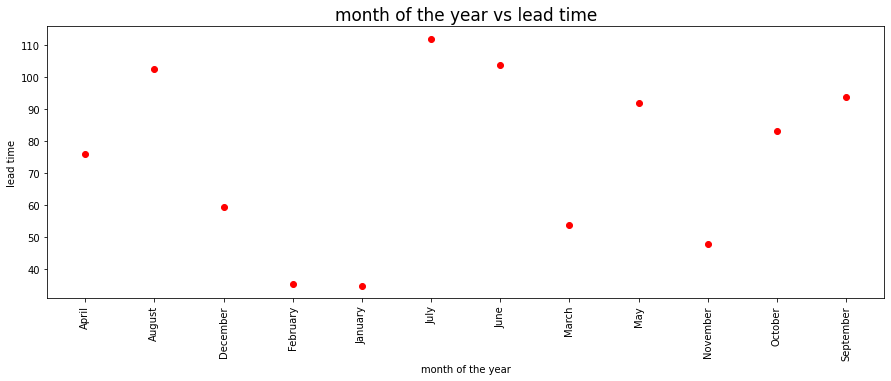

In [70]:
## plot for month of the year and lead time
plt.figure(figsize=(15,5))
plt.plot(a,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs lead time',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel('lead time')
plt.show()

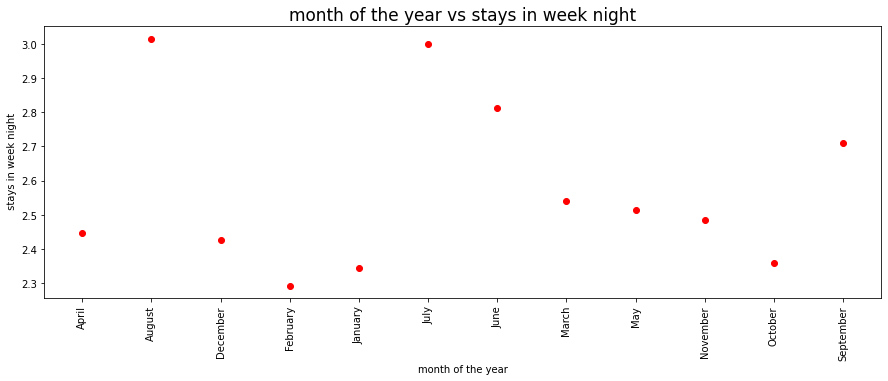

In [71]:
## plot foe month of the year vs stays in week night
plt.figure(figsize=(15,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs stays in week night',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' stays in week night')
plt.show()



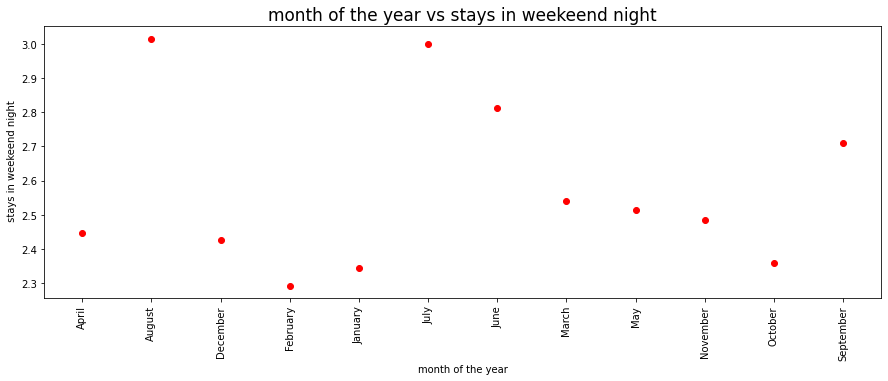

In [72]:
## plot for month of the year vs stays in weekend nights
plt.figure(figsize=(15,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs stays in weekeend night',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' stays in weekeend night')
plt.show()

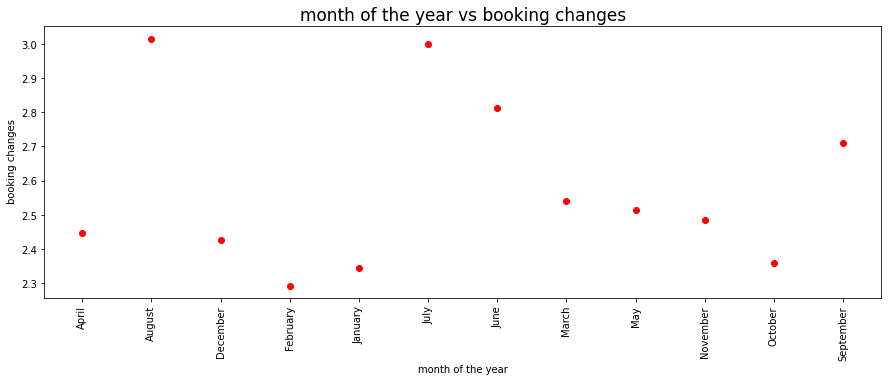

In [73]:
## plot for month of the year vs booking changes
plt.figure(figsize=(15,5))
plt.plot(b,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs booking changes',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' booking changes')
plt.show()

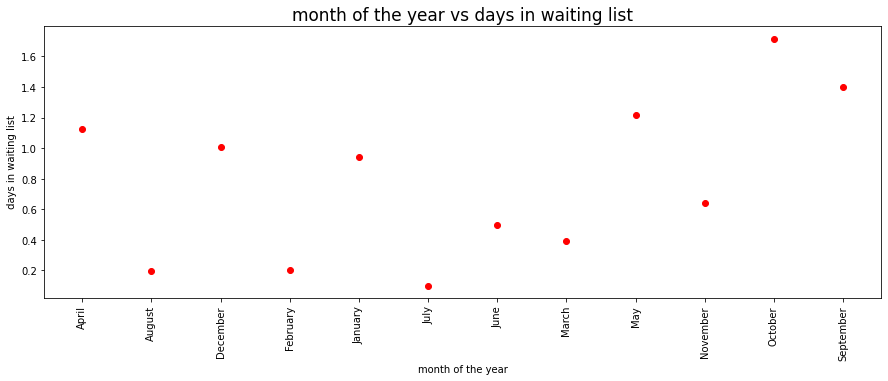

In [74]:
## plot for month of the year vs days in waiting list
plt.figure(figsize=(15,5))
plt.plot(e,'ro',color='r')
plt.xticks(rotation=90)
plt.title('month of the year vs days in waiting list',fontsize=17)
plt.xlabel('month of the year')
plt.ylabel(' days in waiting list')
plt.show()


Lets see the correlation and heat map for the data

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.181671,0.000539,0.005123,0.059999,0.083229,0.080534,0.068020,-0.020589,-0.089691,0.050411,-0.050282,-0.093111,0.001423,0.127965,-0.183089,-0.119956
lead_time,0.181671,1.000000,0.100966,0.009624,0.234674,0.311213,0.137391,0.028356,-0.003705,-0.148085,0.004835,-0.076426,0.077450,0.130113,0.020443,-0.085454,0.034090
arrival_date_week_number,0.000539,0.100966,1.000000,0.093805,0.026459,0.027974,0.023861,0.013430,0.013700,-0.037222,0.006202,-0.020776,0.011612,0.013491,0.097686,0.008695,0.046395
arrival_date_day_of_month,0.005123,0.009624,0.093805,1.000000,-0.016884,-0.027513,-0.001618,0.015930,-0.000778,-0.004343,-0.008625,0.000665,0.006519,0.005384,0.021910,0.008704,-0.001716
stays_in_weekend_nights,0.059999,0.234674,0.026459,-0.016884,1.000000,0.550722,0.086360,0.027812,0.013608,-0.108257,-0.020927,-0.054265,0.049025,-0.031604,0.036282,-0.042796,0.030255
stays_in_week_nights,0.083229,0.311213,0.027974,-0.027513,0.550722,1.000000,0.094508,0.030474,0.016000,-0.114911,-0.019012,-0.057077,0.084204,0.002005,0.051431,-0.044123,0.035405
adults,0.080534,0.137391,0.023861,-0.001618,0.086360,0.094508,1.000000,0.022388,0.016232,-0.173440,-0.042238,-0.117888,-0.049204,-0.016514,0.245169,0.009245,0.110842
children,0.068020,0.028356,0.013430,0.015930,0.027812,0.030474,0.022388,1.000000,0.017523,-0.046026,-0.018992,-0.028553,0.030831,-0.020306,0.325980,0.037057,0.044288
babies,-0.020589,-0.003705,0.013700,-0.000778,0.013608,0.016000,0.016232,0.017523,1.000000,-0.013045,-0.005285,-0.008887,0.080894,-0.006799,0.022759,0.030478,0.094570
is_repeated_guest,-0.089691,-0.148085,-0.037222,-0.004343,-0.108257,-0.114911,-0.173440,-0.046026,-0.013045,1.000000,0.207105,0.447235,0.005920,-0.012737,-0.154771,0.072610,-0.001621


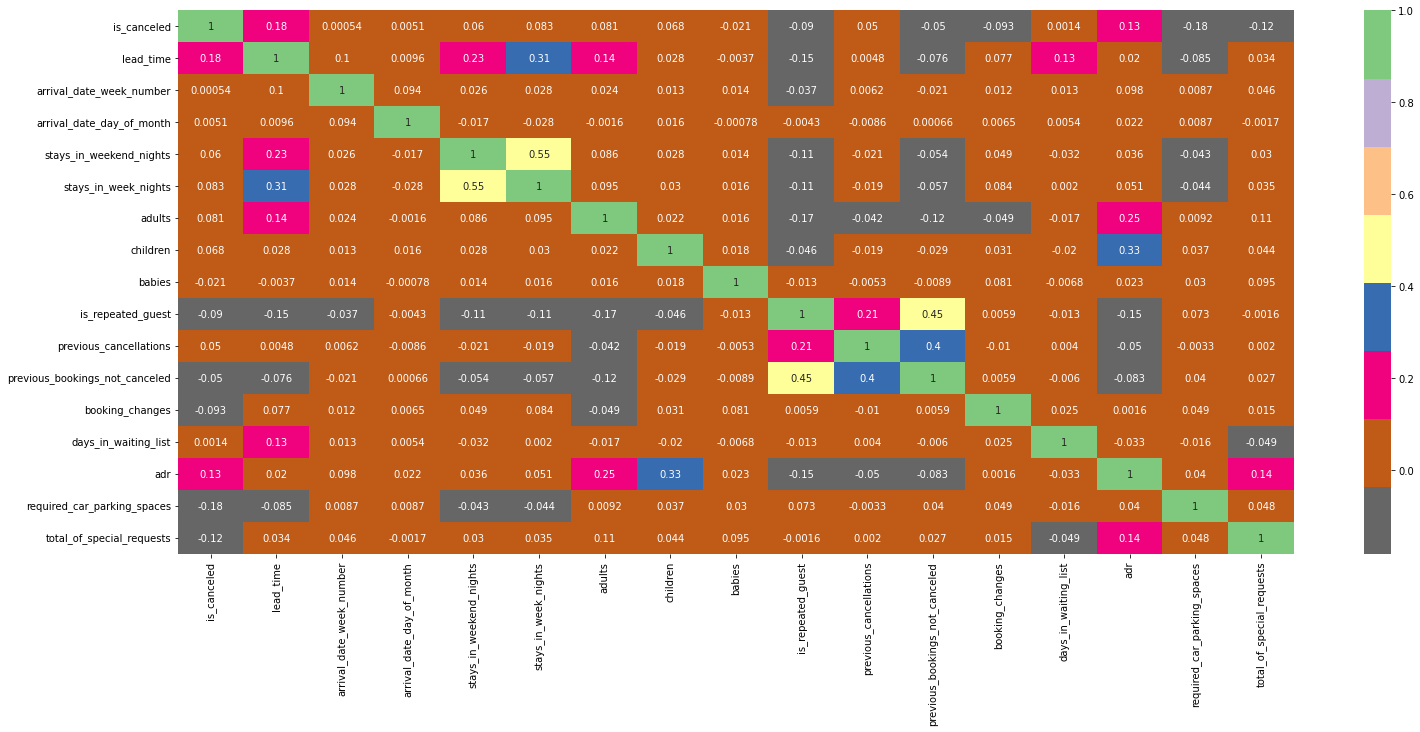

In [75]:
## heat map generation
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cmap='Accent_r',annot=True)
df.corr()